In [1]:
import torch
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('dinosaurs.csv', header = None)
df.columns = ['name']

In [4]:
df.head(5);

In [6]:
#function ord('character') changes character into number abd chr(number) gives character out of numbers
ord('a')

97

In [7]:
chr(97)

'a'

In [63]:
a = ord('a')
def Encode(name):
    name =''.join(['{', name.lower(), '|'])    #'{{}|'.format(name.lower())
    
    out = []
    for char in name:
        char_encoded = torch.zeros((1, 28))
        char_encoded[0, ord(char) - a] = 1
        out.append(char_encoded)
        
    return torch.cat(out, dim = 0)

def Decode(tensor):
    ords = torch.argmax(tensor, dim = 1)
    out = []
    for i in ords:
        out.append(chr(i+a))
    return ''.join(out)    
    

In [64]:
df_encoded = df.name.apply(Encode)

In [65]:
df_encoded

0       [[tensor(0.), tensor(0.), tensor(0.), tensor(0...
1       [[tensor(0.), tensor(0.), tensor(0.), tensor(0...
2       [[tensor(0.), tensor(0.), tensor(0.), tensor(0...
3       [[tensor(0.), tensor(0.), tensor(0.), tensor(0...
4       [[tensor(0.), tensor(0.), tensor(0.), tensor(0...
                              ...                        
1320    [[tensor(0.), tensor(0.), tensor(0.), tensor(0...
1321    [[tensor(0.), tensor(0.), tensor(0.), tensor(0...
1322    [[tensor(0.), tensor(0.), tensor(0.), tensor(0...
1323    [[tensor(0.), tensor(0.), tensor(0.), tensor(0...
1324    [[tensor(0.), tensor(0.), tensor(0.), tensor(0...
Name: name, Length: 1325, dtype: object

In [66]:
class Layer(torch.nn.Module):
    def __init__(self, size_in, size_out, activation_func = torch.sigmoid):
        super(Layer, self).__init__()
        
        self.w = torch.nn.Parameter(
            torch.randn(size_in, size_out, requires_grad = True))
    
        self.b =torch.nn.Parameter(
            torch.randn(1, size_out, requires_grad = True))
        
        self.activation_func = activation_func
        
    def Forward(self, x):
        #print(self.activation_func)
        return self.activation_func(x @ self.w + self.b)
        

In [97]:
class RNN(torch.nn.Module):
    def __init__(self, size_in, size_out, size_mem):
        super(RNN, self).__init__()
       
        self.layer_0 = Layer(size_in + size_mem, size_mem)  # we r gonna get rid of mem layer so size out for layer 0 is size mem        
        self.layer_out = Layer(size_mem, size_out, lambda x: x)
        self.size_mem = size_mem
        
    
    def Forward(self, x):
        mem = torch.zeros(1, self.size_mem)
        out = []
        for i in range(x.shape[0]):
            z = torch.cat([x[[i], :], mem], dim =1)
            mem = self.layer_0.Forward(z)
            out.append(self.layer_out.Forward(mem))  
        out = torch.cat(out, dim = 0)
        return out
        
        
    def Generate(self, start, iterations):
        mem = torch.randn((1, self.size_mem))
        out = [start]
        for i in range(iterations):
            z = torch.cat([out[i], mem], dim =1)
            mem = self.layer_0.Forward(z)
            out.append(self.layer_out.Forward(mem))
            if Decode(out[-1]) == '|': break
            
        out = torch.cat(out, dim = 0)
        return out
        
        
            

In [98]:
#our sizea-in is 28 as we have 26 letter and two stop characters in our encode so total 28 and we want the same to be our size_out
rnn = RNN(28, 28, 14)
opt = torch.optim.Adam(rnn.parameters(), lr = 1e-2)
loss_func = torch.nn.CrossEntropyLoss()  # our loss function is CategeryCross Entropy as we are predicting category leters


In [99]:
df_encoded.sample()

933    [[tensor(0.), tensor(0.), tensor(0.), tensor(0...
Name: name, dtype: object

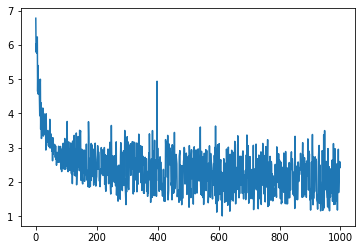

In [100]:
losses=[]
iterations = 1000

for i in range(iterations):
    y = df_encoded.sample().values[0]
    y_hat = rnn.Forward(y)
    loss = loss_func(y_hat[:-1], torch.argmax(y[1:], dim = 1))
    
    loss.backward()
    opt.step()
    opt.zero_grad()
    losses.append(loss.detach())
plt.plot(losses)
    
    

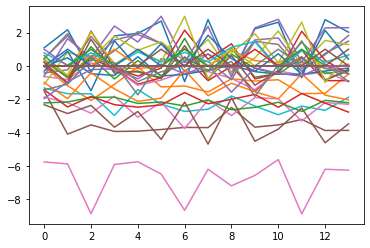

In [101]:
plt.plot(y_hat.detach())
plt.plot(y)


In [212]:
Decode(rnn.Generate(Encode('')[[0], :], 15))


'{uuuusosusususus'

In [4]:
df = pd.DataFrame(data)

In [5]:
df;

In [6]:
df.shape

(1325, 1)

In [7]:
one_hot_dino = pd.get_dummies(df, prefix="", prefix_sep="")


In [8]:
one_hot_dino

,aachenosaurus,aardonyx,abelisaurus,abrictosaurus,abrosaurus,abydosaurus,acanthopholis,achelousaurus,acheroraptor,achillesaurus,...,zhongyuansaurus,zhuchengceratops,zhuchengosaurus,zhuchengtyrannus,ziapelta,zigongosaurus,zizhongosaurus,zuniceratops,zuolong,zupaysaurus
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:

[col for col in one_hot_dino.columns if np.sum(one_hot_dino[col], axis = 0) >1]

['calamospondylus',
 'gigantosaurus',
 'palaeosaurus',
 'procerosaurus',
 'protorosaurus',
 'titanosaurus',
 'ultrasaurus']

In [10]:
flat_dino = np.sum(one_hot_dino, axis = 0)